#### Feeling Lucky? What data can tell you about winning the lottery!!!
#### Group 4: Ashley Williams, Anthony Hughes, Cealin Conroy, Christina Redmond, Leslie Tyler, 

Description: 
Project Team 7 has undertaken the initiative "Feeling Lucky!" Our team is committed to helping society understand how to use lottery trend analysis information to improve their lottery picks. Our team will analyze data sets from several U.S. lottery sources to identify commonalities. Project Team 7 is particularly interested in identifying the following: 
1.	The frequency with which specific winning numbers occur
2.	Numbers groups that result in winning strings 
3.	Are you feeling lucky? Pick a number!!
The project team believes its research will provide a resource to improve its chances of living the American dream, a leisure lifestyle sipping lattes, and checking our lottery portfolio.


Questions to answer:
Can data help you win the lottery?
What are the most common winning numbers?
Based off listed probability of winning... does it differ between state? 
If so, is it just chance or does the period of time the lottery has been running in that state account for it?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import requests
import random
import os
import xlrd

In [2]:
#Read excel files
pick3 = pd.read_excel("Resource/pick3.xlsm") 

# Concatenate Num1, Num2, Num3 becasue the dataframe would drop the "0" digit in Num1

pick3['WinningNumber'] = ''
pick3['WinningNumber'] = pick3['WinningNumber'].map(str) + pick3['Num1'].astype(str) + pick3['Num2'].astype(str) + pick3['Num3'].astype(str)
pick3

,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber
0,2018-01-01,Maryland,Midday,9,1,5,915
1,2018-01-01,Maryland,Evening,8,2,1,821
2,2018-01-01,Virginia,Midday,9,9,1,991
3,2018-01-01,Virginia,Evening,4,2,6,426
4,2018-01-01,"Washington,DC",Midday,5,9,3,593
...,...,...,...,...,...,...,...
4080,2020-01-30,"Washington,DC",Midday,6,1,2,612
4081,2020-01-31,Maryland,Midday,1,1,0,110
4082,2020-01-31,Maryland,Evening,0,1,8,018
4083,2020-01-31,"Washington,DC",Evening,6,0,4,604


In [3]:
# What are the most frequent number in Pick 3 (Hot, Cold)
pick3['WinningNumber'].head()

0    915
1    821
2    991
3    426
4    593
Name: WinningNumber, dtype: object

In [4]:
#for col in pick3.columns:
    #print(col)

In [5]:
num1_freq = pick3['Num1'].value_counts().index.to_list()
num2_freq = pick3['Num2'].value_counts().index.to_list()
num3_freq = pick3['Num3'].value_counts().index.to_list()

In [6]:
print (num1_freq, 
       num2_freq, 
       num3_freq)


[6, 7, 3, 4, 2, 8, 5, 9, 0, 1] [1, 4, 0, 2, 6, 8, 9, 3, 5, 7] [8, 1, 2, 6, 7, 0, 5, 3, 4, 9]


In [7]:
# Pick3 Numbers and Frequency 
win = []
for col in ["Num1", "Num2", "Num3"]:
    win_series = pick3[col].value_counts()
    win_series.name = col
    win.append(win_series)
    print(win_series)
    print()

6    444
7    431
3    422
4    412
2    406
8    402
5    401
9    398
0    389
1    380
Name: Num1, dtype: int64

1    446
4    430
0    429
2    415
6    410
8    408
9    395
3    387
5    386
7    379
Name: Num2, dtype: int64

8    441
1    420
2    420
6    413
7    412
0    412
5    408
3    395
4    389
9    375
Name: Num3, dtype: int64



In [8]:
#test = win_series.to_frame().reset_index()
#test

best1 = num1_freq[0:3]
best2 = num2_freq[0:3]
best3 = num3_freq[0:3]



In [9]:
#generate random number based of best1,2,3
gen1 = random.choice(best1)
gen2 = random.choice(best2)
gen3 = random.choice(best3)

gen_pick3 = f'{gen1}{gen2}{gen3}'

gen_pick3


'308'

In [10]:
#input any number see how many times it wins straight 
straight = pick3.loc[pick3['WinningNumber'] == gen_pick3]
straight


,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber
88,2018-01-16,"Washington,DC",Evening,3,0,8,308
240,2018-02-13,"Washington,DC",Midday,3,0,8,308
2485,2019-04-05,Maryland,Midday,3,0,8,308
3277,2019-08-27,Virginia,Midday,3,0,8,308
3871,2019-12-13,Maryland,Midday,3,0,8,308
3953,2019-12-28,Maryland,Evening,3,0,8,308


In [11]:
pick3['SortedNumber'] = None

for index, row in pick3.iterrows():
    #print(row['WinningNumber'])
    row = [char for char in row['WinningNumber']]
    #print(row)
    box = ''.join(sorted(row))
    pick3.loc[index,'SortedNumber'] = box

In [12]:
pick3

,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber
0,2018-01-01,Maryland,Midday,9,1,5,915,159
1,2018-01-01,Maryland,Evening,8,2,1,821,128
2,2018-01-01,Virginia,Midday,9,9,1,991,199
3,2018-01-01,Virginia,Evening,4,2,6,426,246
4,2018-01-01,"Washington,DC",Midday,5,9,3,593,359
...,...,...,...,...,...,...,...,...
4080,2020-01-30,"Washington,DC",Midday,6,1,2,612,126
4081,2020-01-31,Maryland,Midday,1,1,0,110,011
4082,2020-01-31,Maryland,Evening,0,1,8,018,018
4083,2020-01-31,"Washington,DC",Evening,6,0,4,604,046


In [13]:
gen_box_pick3 = ''.join(sorted([g for g in gen_pick3]))
gen_box_pick3

'038'

In [14]:
box = pick3.loc[pick3['SortedNumber'] == gen_box_pick3]
box

,Date,State,TimeofDay,Num1,Num2,Num3,WinningNumber,SortedNumber
28,2018-01-06,Maryland,Evening,8,0,3,803,038
88,2018-01-16,"Washington,DC",Evening,3,0,8,308,038
203,2018-02-06,"Washington,DC",Evening,3,8,0,380,038
240,2018-02-13,"Washington,DC",Midday,3,0,8,308,038
483,2018-03-29,"Washington,DC",Evening,3,8,0,380,038
1159,2018-08-03,Maryland,Evening,3,8,0,380,038
1210,2018-08-13,Virginia,Evening,0,8,3,083,038
1291,2018-08-28,Virginia,Evening,8,3,0,830,038
1371,2018-09-13,Virginia,Midday,0,8,3,083,038
2222,2019-02-16,Maryland,Midday,8,3,0,830,038


([<matplotlib.patches.Wedge at 0x7f7f408269a0>,
 [Text(0.24565473137850488, 1.0722190788040262, 'Hot'),
  Text(-0.9415137760937801, -0.5688161472968499, 'Warm'),
  Text(0.7715826785605588, -0.784002659526939, 'Cold')],
 [Text(0.13399348984282083, 0.5848467702567416, '42.55319%'),
  Text(-0.5135529687784254, -0.31026335307100905, '31.91489%'),
  Text(0.4208632792148503, -0.42763781428742126, '25.53191%')])

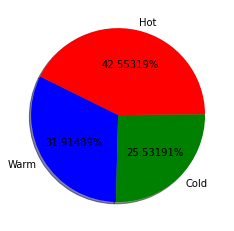

In [15]:
import matplotlib.pyplot as plt
test_x = ["Hot", "Warm", "Cold"]

# Labels for the sections of our pie chart
labels = ["Hot", "Warm", "Cold", ]

# The values of each section of the pie chart
sizes = [100, 75, 60]

# The colors of each section of the pie chart
colors = ["red", "blue", "green"]

explode = (0,0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.5f%%", shadow=True, startangle=.5)

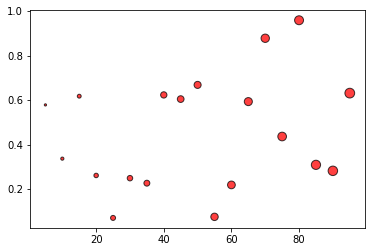

In [16]:
import numpy as np
x_limit = 100
# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(5, x_limit, 5)

# Create a random array of data that we will use for our y values
pick3 = [random.random() for value in x_axis]
plt.scatter(x_axis, pick3, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

In [17]:
# Pick 4 Number and Frequency

In [18]:
pick4 = pd.read_excel("Resource/pick4.xlsm") 

# Concatenate Num1, Num2, Num3 becasue the dataframe would drop the "0" digit in Num1
pick4['Winning Number'] = ''
pick4['Winning Number'] = pick4['Winning Number'].map(str) + pick4['Num1'].astype(str) + pick4['Num2'].astype(str) + pick4['Num3'].astype(str) + pick4['Num4'].astype(str) 
pick4

,Date,State,Time of Day,Num1,Num2,Num3,Num4,Winning Number
0,2018-01-01,Maryland,Midday,1,6,0,9,1609
1,2018-01-01,Maryland,Evening,8,5,7,1,8571
2,2018-01-01,Virginia,Midday,0,9,9,8,0998
3,2018-01-01,Virginia,Night,0,8,9,9,0899
4,2018-01-01,Virginia,Midday,0,9,9,8,0998
...,...,...,...,...,...,...,...,...
5632,2020-01-31,Maryland,Evening,2,7,8,9,2789
5633,2020-01-31,Virginia,Midday,4,6,8,6,4686
5634,2020-01-31,Virginia,Night,4,9,7,1,4971
5635,2020-01-31,"Washington,DC",Midday,0,9,4,6,0946


In [19]:
# What are the most frequent number in Pick 3 (Hot, Cold)
pick4['Winning Number'].head()

0    1609
1    8571
2    0998
3    0899
4    0998
Name: Winning Number, dtype: object

In [20]:
num1_freq = pick3['Num1'].value_counts().index.to_list()
num2_freq = pick3['Num2'].value_counts().index.to_list()
num3_freq = pick3['Num3'].value_counts().index.to_list()
num4_freq = pick4['Num4'].value_counts().index.to_list()

TypeError: list indices must be integers or slices, not str

In [ ]:
num1_freq

In [ ]:
#def box(b):
    #return box ['WinningNumber']
#box = ['WinningNumber']
#box = random.shuffle[pick3['WinningNumber'] == '987']
#print("Resuffled box : ", box)

In [ ]:
test_x = []
number = []
for index, row in test.iterrows():
    number.append(row[1])
    if 13<row[1]>10:
        test_x.append('hot')
    elif 9<row[1]>5:
        test_x.append("warm")
    else:
        test_x.append("cold")
test_x